# Load necessary libraries and functions

In [1]:
# Only two files are needed for reproducing the example results: "./files/adjacency_matrices/756029989_natural_scenes.npz" and "./files/adjacency_matrices/756029989_natural_scenes_confidence.npz"
from signed_motif_detection import *

# Load example graph data

In [2]:
# Example graph for motif identification
G = load_graphs(directory='./files/adjacency_matrices', session='756029989', stimulus='natural_scenes', weight=True)
print(G)

DiGraph with 193 nodes and 385 edges


# Generate random networks with various reference models

In [3]:
model_choices = ['erdos_renyi', 'degree_preserving', 'pair_preserving', 'signed_pair_preserving']
input_G = G
num_rewire = 200
model = model_choices[3]
weight = 'confidence' # Z score of jitter-corrected CCG, can also be 'weight' for connection strength (jitter-corrected CCG) in the example graph. Use your own edge weight for your graph.
cc = False
Q = 100
parallel = True # Set to True if you want to use multiprocessing to generate random graphs in parallel.
num_cores = 23

random_graphs = random_graph_generator(input_G=input_G, num_rewire=num_rewire, model=model, weight=weight, cc=cc, Q=Q, parallel=parallel, num_cores=num_cores, disable=False)

100%|██████████| 200/200 [00:05<00:00, 36.65it/s]


# Test if random networks are properly generated

In [5]:
# Just for vefication purpose, this part can be skipped.
verify_random_graphs(G, random_graphs, model, weight=weight)

******Property verification for the generated random graphs using signed_pair_preserving model******
Number of nodes/edges and density test...


100%|██████████| 200/200 [00:00<00:00, 11779.44it/s]


Sum of edge weights test...


100%|██████████| 200/200 [00:00<00:00, 1701.40it/s]


Degree distribution test...


100%|██████████| 200/200 [00:00<00:00, 7484.68it/s]


Pair distribution test...


100%|██████████| 200/200 [00:04<00:00, 40.82it/s]


Signed pair distribution test...


100%|██████████| 200/200 [00:02<00:00, 78.28it/s]

******All tests are passed!******


# Motif census for real graph and random graphs

In [6]:
# Example code to identify motifs in the functional network.
# There are a total of 16 triplet motif types, but '003', '012', '102' are not connected and hence are not considered here.
# Following motif types correspond to motif ID=1-13 in the paper.
motif_types = ['021D', '021U', '021C', '111D', '111U', '030T', '030C', '201', '120D', '120U', '120C', '210', '300']
motif_edges, motif_sms = {}, {}
for motif_type in motif_types:
	motif_edges[motif_type], motif_sms[motif_type] = get_edges_sms(motif_type, weight=weight)

intensity_df = motif_census(G, random_graphs, all_signed_motif_types, motif_types, motif_edges, motif_sms, weight=weight, parallel=parallel, num_cores=num_cores)

Motif census for the real graph...
Motif census for the random graphs...


100%|██████████| 200/200 [00:09<00:00, 21.57it/s]


# Visualization of motif significance sequences

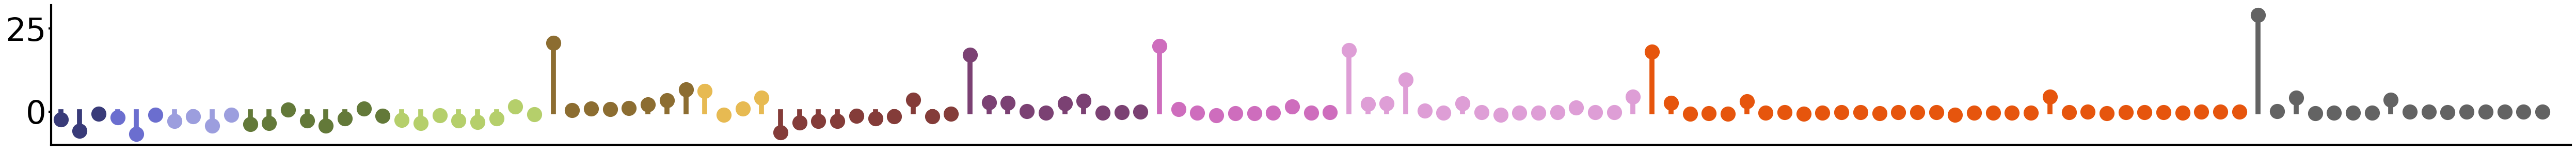

In [7]:
# Visualization of motif intensity Z scores
plot_motif_intensity_z_scores(intensity_df)